In [1]:
from pylab import *
from scipy.integrate import *

La caida libre con fricción, $f_{fric} = -\gamma |v|\hat v$, es:
$$
\ddot x = -\gamma v_x \\
\ddot y = -g -\gamma v_y
$$
o de manera equivalente
$$
\dot x = v_x \\
\dot v_x = -\gamma v_x \\
\dot y = v_y \\
\dot v_y = -g -\gamma v_y
$$

In [69]:
def caida(t,vec,g=9.81,gamma=0):
    d_vec = zeros_like(vec)
    # vec = x , vx , y , vy
    d_vec[0] = vec[1]
    d_vec[1] = -gamma*vec[1]
    d_vec[2] = vec[3]
    d_vec[3] = -g - gamma*vec[3]
    return d_vec

def suelo(t,vec,g=9.81,gamma=0):
    return vec[2]

In [126]:
tf = 2
ci = [0,0.5,2,0]
t = linspace(0,tf)
x_v = solve_ivp(caida,(0,tf),ci,args=(9.81,0.0,),dense_output=True,events=suelo)
x_v_f = solve_ivp(caida,(0,tf),ci,args=(9.81,0.3,),dense_output=True,events=suelo)
x_v.t_events[0][0]

0.6385508568141007

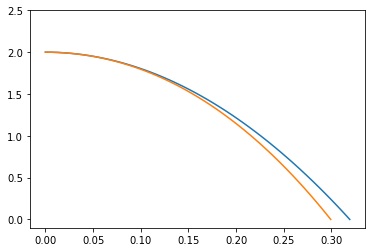

In [112]:
t = linspace(0,x_v.t_events[0][0])
x,vx,y,vy = x_v.sol(t)
plot(x,y)
t = linspace(0,x_v_f.t_events[0][0])
x,vx,y,vy = x_v_f.sol(t)
plot(x,y)
ylim([-0.1,2.5])
show()

In [188]:
def caida_rebote(ci,tf,g=9.81,fric=0,reb_tot=10):
    delta_t = 0.1
    x , y , t , reb , ti = array([]) , array([]) , array([]) , 0 , 0
    while reb <= reb_tot-1:
        x_v = solve_ivp(caida,(0,tf),ci,args=(g,fric,),
                        dense_output=True,events=suelo)
        t_loc = arange(ti,x_v.t_events[0][-1],delta_t)
        #t_loc = linspace(0,x_v.t_events[0][-1],pts_rebote)
        x_loc , vx_loc , y_loc , vy_loc = x_v.sol(t_loc)
        x , y = concatenate((x,x_loc)) , concatenate((y,y_loc))
        ci = [x_loc[-1] , vx_loc[-1] , y_loc[-1] , -vy_loc[-1]]
        reb += 1
    return x,y

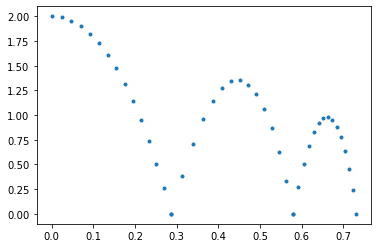

In [189]:
x,y = caida_rebote(ci,3,fric=0.5,reb_tot=3)
plot(x,y,'.')
show()

In [193]:
arange(0,1.05,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])